In [1]:
# Load libraries
import pandas as pd

#Data link - https://archive.ics.uci.edu/dataset/502/online+retail+ii

# Load the data
data = pd.read_excel("/content/drive/MyDrive/DataForVideos/online_retail_II.xlsx", "Year 2009-2010")

# Remove missing Customer IDs
data = data.dropna(subset=['Customer ID'])

# Remove negative or zero quantities and prices
data = data[(data['Quantity'] > 0) & (data['Price'] > 0)]

# Calculate the Monetary value
data['TotalPrice'] = data['Quantity'] * data['Price']

# Define the reference date for Recency calculation
reference_date = pd.to_datetime("2011-12-09")

In [2]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming `data` DataFrame and `reference_date` have been defined as shown previously

# Calculate RFM metrics
rfm = data.groupby('Customer ID').agg(
    Recency=('InvoiceDate', lambda x: (reference_date - x.max()).days),
    Frequency=('Invoice', 'nunique'),
    Monetary=('TotalPrice', 'sum')
).reset_index()

# Assign scores from 1 to 5 for each RFM metric
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=False, duplicates='drop') + 1
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=False, duplicates='drop') + 1
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=False, duplicates='drop') + 1

# Scale the RFM scores
scaler = StandardScaler()
rfm_scaled = pd.DataFrame(scaler.fit_transform(rfm[['R_Score', 'F_Score', 'M_Score']]), columns=['R_Score', 'F_Score', 'M_Score'])


In [4]:
rfm_scaled.head()

,R_Score,F_Score,M_Score
0,0.719732,1.674998,-0.706943
1,-1.387182,-0.860727,0.706943
2,0.719732,-0.860727,-1.413886
3,0.017427,-0.015486,1.413886
4,-1.387182,-0.860727,-0.706943


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

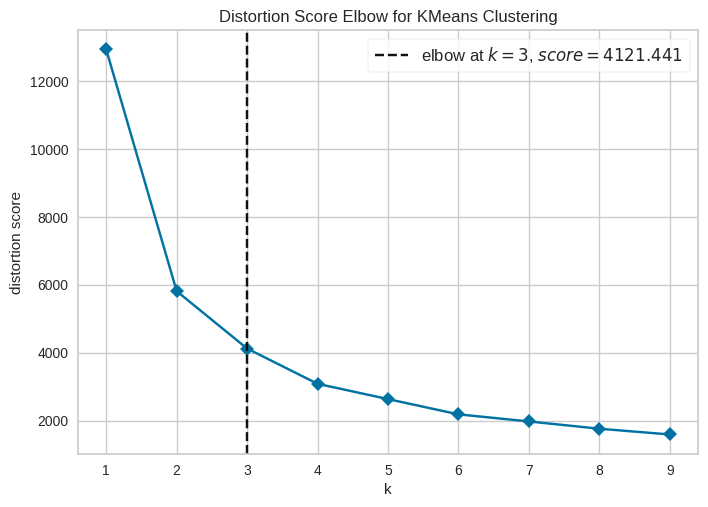

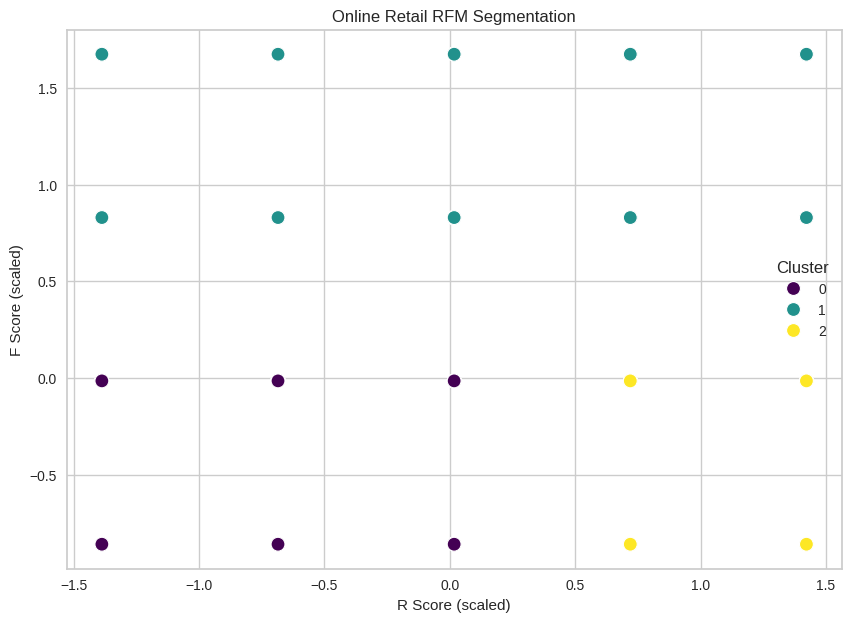

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

# Assuming `rfm_scaled` DataFrame has been defined as shown previously

# Determine the optimal number of clusters using the Elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings=False)
visualizer.fit(rfm_scaled)
visualizer.show()

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, n_init=25, random_state=123)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 7))
# Use .iloc to extract the columns for the scatterplot
sns.scatterplot(x=rfm_scaled.iloc[:, 0], y=rfm_scaled.iloc[:, 1], hue=rfm['Cluster'], palette='viridis', s=100)
plt.title('Online Retail RFM Segmentation')
plt.xlabel('R Score (scaled)')
plt.ylabel('F Score (scaled)')
plt.legend(title='Cluster', loc='best')
plt.show()

In [ ]:
import pandas as pd

# Assuming `rfm` DataFrame has been defined as shown previously

# Summary of each cluster
rfm_summary = rfm.groupby('Cluster').agg(
    Recency=('Recency', 'mean'),
    Frequency=('Frequency', 'mean'),
    Monetary=('Monetary', 'mean'),
    Count=('Customer ID', 'count')
).reset_index()

In [ ]:
#rfm_summary.head()